In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [11]:
df['Loan_Status']= df['Loan_Status'].map({'Y':1,'N':0})

In [12]:
df['Loan_Status'].head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [15]:
for col in num_cols:
    df[col].fillna(df[col].median(),inplace = True)

C:\Users\chinm\AppData\Local\Temp\ipykernel_11160\1935231339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace = True)


In [17]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [18]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df = df.drop('Loan_ID',axis=1)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [25]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [27]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

model.fit(X_train,y_train)

preds = model.predict(X_test)

print(accuracy_score(y_test,preds))

0.7723577235772358


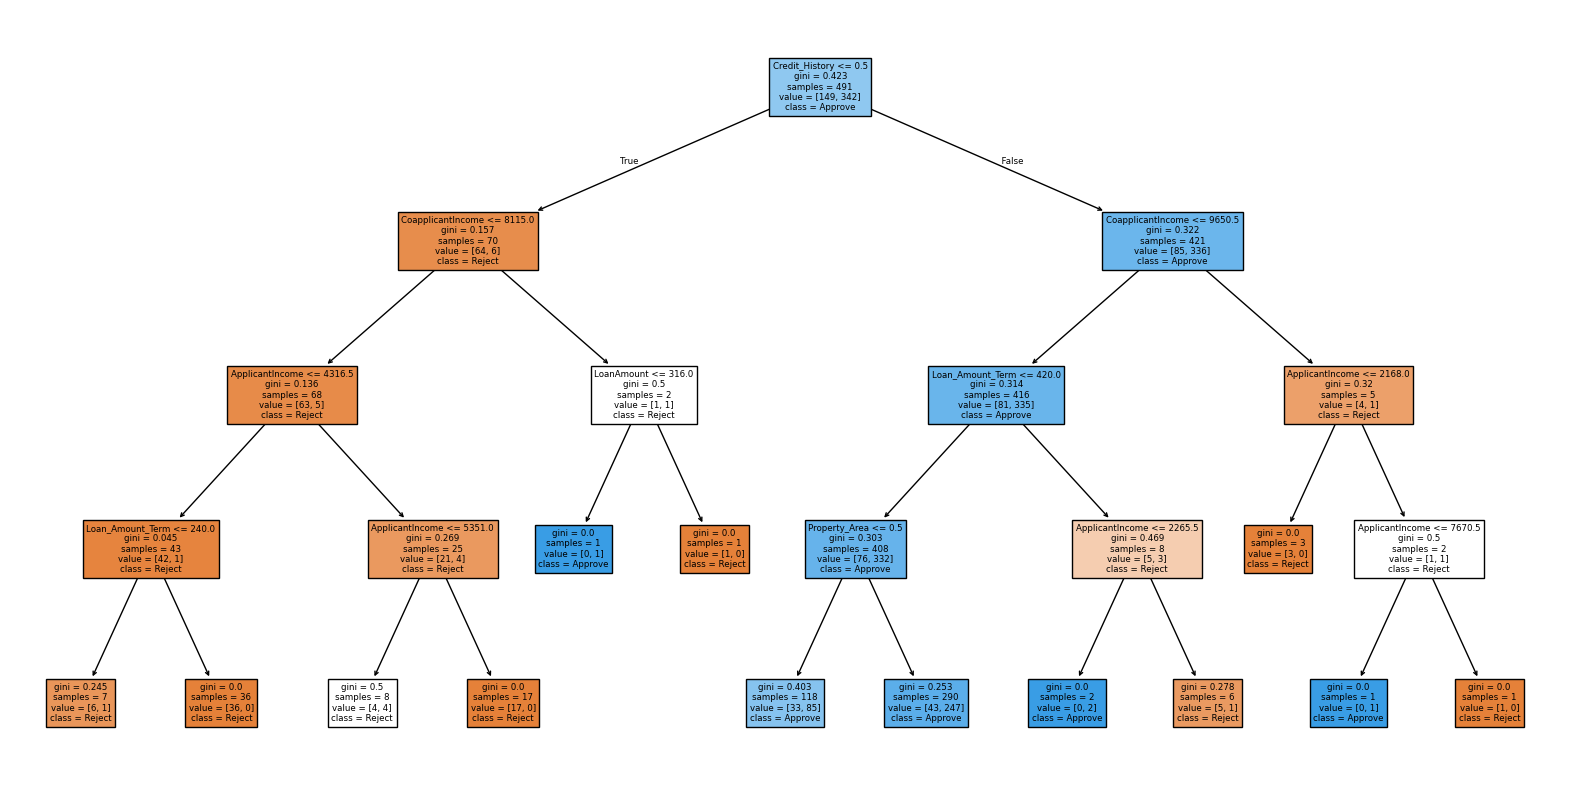

In [32]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Reject','Approve'],
    filled=True
)
plt.show()

In [35]:
importance = pd.Series(model.feature_importances_,index=X.columns)
importance.sort_values(ascending=False)

Credit_History       0.767285
ApplicantIncome      0.088096
CoapplicantIncome    0.054498
Loan_Amount_Term     0.041055
Property_Area        0.036470
LoanAmount           0.012595
Gender               0.000000
Dependents           0.000000
Married              0.000000
Education            0.000000
Self_Employed        0.000000
dtype: float64

In [36]:
train_preds = model.predict(X_train)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_test,preds))

0.8329938900203666
0.7723577235772358


In [38]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs= -1
)

grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

KeyboardInterrupt: 

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,          # ⭐ IMPORTANT FIX
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1

In [41]:
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_model.fit(X_train, y_train)

best_preds = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Final Test Accuracy:", accuracy_score(y_test, best_preds))


Final Test Accuracy: 0.7886178861788617


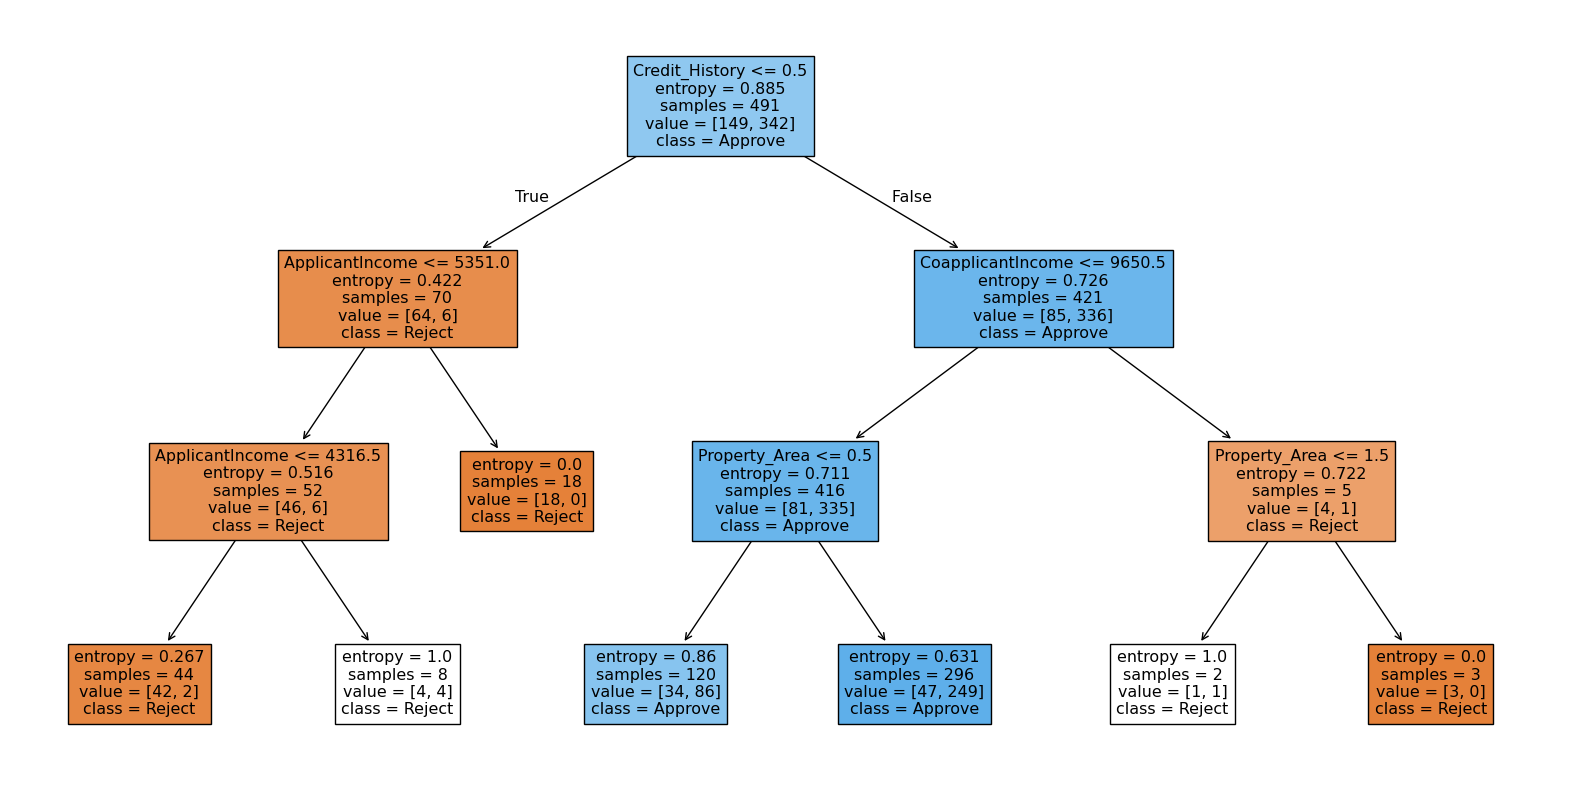

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['Reject','Approve'],
    filled=True
)
plt.show()


In [43]:
sample = X_test.iloc[[0]]
sample


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,0,0,9083,0.0,228.0,360.0,1.0,1


In [44]:
best_model.predict(sample)


array([1])

In [45]:
from sklearn.tree import export_text

tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)


|--- Credit_History <= 0.50
|   |--- ApplicantIncome <= 5351.00
|   |   |--- ApplicantIncome <= 4316.50
|   |   |   |--- class: 0
|   |   |--- ApplicantIncome >  4316.50
|   |   |   |--- class: 0
|   |--- ApplicantIncome >  5351.00
|   |   |--- class: 0
|--- Credit_History >  0.50
|   |--- CoapplicantIncome <= 9650.50
|   |   |--- Property_Area <= 0.50
|   |   |   |--- class: 1
|   |   |--- Property_Area >  0.50
|   |   |   |--- class: 1
|   |--- CoapplicantIncome >  9650.50
|   |   |--- Property_Area <= 1.50
|   |   |   |--- class: 0
|   |   |--- Property_Area >  1.50
|   |   |   |--- class: 0



In [46]:
import joblib
joblib.dump(best_model,'decision_tree_model.joblib')



['decision_tree_model.joblib']